In [1]:
import postgkyl as pg
import numpy as np
import matplotlib.pyplot as plt

# Load GK data
simName = ['output_bgk_lbo_high/gk_bgk_im_periodic_sodshock_1x2v_p1-', 'output_bgk_lbo_high/gk_lbo_periodic_sodshock_1x2v_p1-', 'output_euler/gk_bgk_im_periodic_sodshock_1x2v_p1-']
spName = 'neut' 
diagName = '_M0_'
frame = 10

polyOrder = 1
basisType = 'ms'

M0 = []
fileName = simName[0] + spName + diagName +'0.gkyl'
data = pg.GData(fileName)
interp = pg.GInterpModal(data, polyOrder, basisType)
grid, dataInt = interp.interpolate()
M0.append(np.ravel(dataInt))
for i in range(len(simName)):
    fileName = simName[i] + spName + diagName + str(frame)+'.gkyl'
    data = pg.GData(fileName)
    interp = pg.GInterpModal(data, polyOrder, basisType)
    grid, dataInt = interp.interpolate()
    M0.append(np.ravel(dataInt))

grid = np.ravel(grid)
grid = (grid[:-1]+grid[1:])/2
print(np.shape(grid), np.shape(M0))

# Load Euler data
data_euler = pg.GData('output_euler/euler_periodic_sodshock-euler_10.gkyl')
grid_euler = np.ravel(data_euler.get_grid())
grid_euler = (grid_euler[:-1]+grid_euler[1:])/2
M0_euler = np.ravel(data_euler.get_values()[:,0])
print(np.shape(grid_euler), np.shape(M0_euler))

(128,) (4, 128)
(512,) (512,)


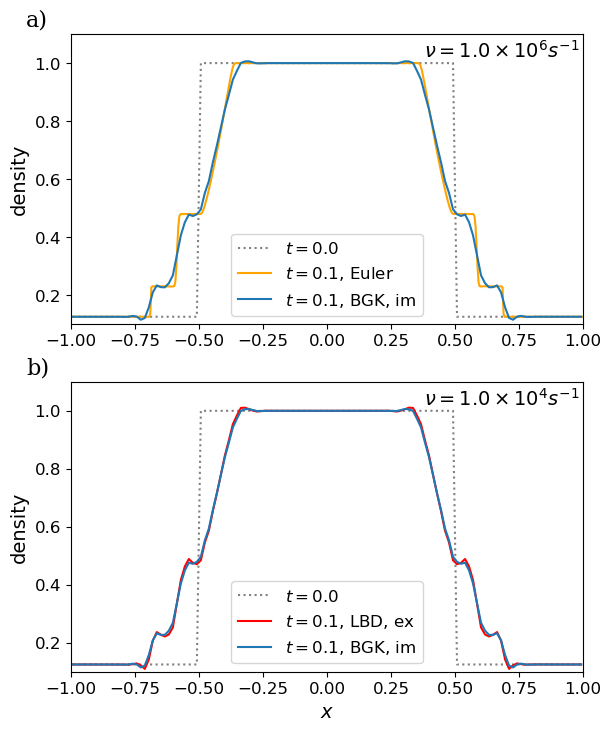

In [5]:
from matplotlib.transforms import ScaledTranslation

lblSize        = 14
ttlSize        = 16
tickSize       = 12
lgdSize        = 12
txtSize        = 14

lineStyle = [':', '-', '-']
label = [r'$t=0.0$', r'$t=0.1$ BGK, im', r'$t=0.1$ LBO, ex']

fig, axs = plt.subplot_mosaic([['a)'], ['b)']],
                              layout='constrained', figsize=[6.0,7.2])

for label, ax in axs.items():
    # Use ScaledTranslation to put the label
    # - at the top left corner (axes fraction (0, 1)),
    # - offset 20 pixels left and 7 pixels up (offset points (-20, +7)),
    # i.e. just outside the axes.
    ax.text(
        0.0, 1.0, label, transform=(
            ax.transAxes + ScaledTranslation(-32/72, +2/72, fig.dpi_scale_trans)),
        fontsize=ttlSize, va='bottom', fontfamily='serif')

axs['a)'].plot(grid, M0[0], color='grey', linestyle=lineStyle[0], label=r'$t=0.0$')
axs['a)'].plot(grid_euler, M0_euler, color='orange', linestyle=lineStyle[2], label=r'$t=0.1$, Euler')
axs['a)'].plot(grid, M0[3], color='tab:blue', linestyle=lineStyle[1], label=r'$t=0.1$, BGK, im')
axs['a)'].text(0.38, 1.02, r'$\nu=1.0\times10^{6}s^{-1}$', fontsize=txtSize)
axs['a)'].set_xlim(-1.0, 1.0)
axs['a)'].set_ylim(0.1, 1.1)
axs['a)'].set_ylabel('density', fontsize=lblSize)
axs['a)'].tick_params(labelsize=tickSize)
axs['a)'].legend(fontsize=lgdSize) 

axs['b)'].plot(grid, M0[0], color='grey', linestyle=lineStyle[0], label=r'$t=0.0$')
axs['b)'].plot(grid, M0[2], color='red', linestyle=lineStyle[2], label=r'$t=0.1$, LBD, ex')
axs['b)'].plot(grid, M0[1], color='tab:blue', linestyle=lineStyle[1], label=r'$t=0.1$, BGK, im')
axs['b)'].text(0.38, 1.02, r'$\nu=1.0\times10^{4}s^{-1}$', fontsize=txtSize)
axs['b)'].set_xlim(-1.0, 1.0)
axs['b)'].set_ylim(0.1, 1.1)
axs['b)'].set_xlabel(r'$x$', fontsize=lblSize)
axs['b)'].set_ylabel('density', fontsize=lblSize)
axs['b)'].tick_params(labelsize=tickSize)
axs['b)'].legend(fontsize=lgdSize)   

#plt.show()
plt.savefig('sodshock.png')